In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

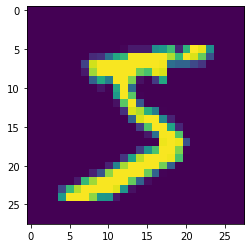

In [4]:
plt.imshow(X_train[0])

In [5]:
input_shape = (28,28,1)
num_classes = 10
img_rows, img_cols = 28,28

In [6]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

In [7]:
X_train = X_train.reshape(X_train.shape[0], img_rows,img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)


In [8]:
from keras.utils import np_utils
 

In [9]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout,MaxPool2D,Flatten,Dense

Model Architecture - 1

In [13]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=input_shape))
model1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model1.add(Conv2D(64, kernel_size=(3*3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model1.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model1.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        165952    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 64)          3

In [14]:
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
hist1 = model1.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 43s 6ms/step - loss: 0.1583 - accuracy: 0.9505 - val_loss: 0.0633 - val_accuracy: 0.9813
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0518 - accuracy: 0.9856 - val_loss: 0.1024 - val_accuracy: 0.9714
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0433 - accuracy: 0.9889 - val_loss: 0.0353 - val_accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0395 - accuracy: 0.9904 - val_loss: 0.0414 - val_accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0353 - accuracy: 0.9916 - val_loss: 0.1091 - val_accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0385 - accuracy: 0.9920 - val_loss: 0.0479 - val_accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0359 - accuracy: 0.9923 - val_loss: 0.0601 - val_ac

Architecture - 2

In [16]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=input_shape))
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model2.add(Conv2D(64, kernel_size=(3*3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        165952    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 32)          18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

In [17]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
hist2 = model2.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1307 - accuracy: 0.9589 - val_loss: 0.0354 - val_accuracy: 0.9883
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0429 - accuracy: 0.9872 - val_loss: 0.0322 - val_accuracy: 0.9903
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0334 - accuracy: 0.9901 - val_loss: 0.0285 - val_accuracy: 0.9907
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0261 - accuracy: 0.9923 - val_loss: 0.0295 - val_accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0233 - accuracy: 0.9932 - val_loss: 0.0303 - val_accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0184 - accuracy: 0.9950 - val_loss: 0.0446 - val_accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0160 - accuracy: 0.9956 - val_loss: 0.0420 - val_ac

In [21]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=input_shape,padding='same'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Conv2D(32,kernel_size=(3,3), activation='relu', padding='same'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Conv2D(32,kernel_size=(3,3), activation='relu', padding='same'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Flatten())
model3.add(Dense(32, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)              

In [22]:
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
hist3 = model3.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1921 - accuracy: 0.9387 - val_loss: 0.0581 - val_accuracy: 0.9813
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0557 - accuracy: 0.9827 - val_loss: 0.0414 - val_accuracy: 0.9872
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0393 - accuracy: 0.9883 - val_loss: 0.0374 - val_accuracy: 0.9879
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0304 - accuracy: 0.9903 - val_loss: 0.0342 - val_accuracy: 0.9899
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0340 - val_accuracy: 0.9908


Arhitecture - 4

In [25]:
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=input_shape, padding='same', strides=(2, 2)))
model4.add(Conv2D(32,kernel_size=(3,3), activation='relu', padding='same', strides=(2, 2)))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(Conv2D(32,kernel_size=(3,3), activation='relu', padding='same', strides=(2, 2))) 
model4.add(Flatten())
model4.add(Dense(10, activation='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 32)          9248      
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 20,106
Trainable params: 20,106
Non-trainable params: 0
__________________________________________________

In [26]:
model4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
hist4 = model4.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2677 - accuracy: 0.9178 - val_loss: 0.1003 - val_accuracy: 0.9693
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0961 - accuracy: 0.9699 - val_loss: 0.0779 - val_accuracy: 0.9749
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0703 - accuracy: 0.9772 - val_loss: 0.0582 - val_accuracy: 0.9812
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0562 - accuracy: 0.9822 - val_loss: 0.0557 - val_accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0476 - accuracy: 0.9851 - val_loss: 0.0462 - val_accuracy: 0.9842


Architecture 5




In [28]:
model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=input_shape, padding='same', strides=(2, 2)))
model5.add(MaxPool2D(pool_size=(2,2)))
model5.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same', strides=(2, 2))) 
model5.add(Flatten())
model3.add(Dense(32, activation='relu'))
model5.add(Dense(10, activation='softmax'))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                10250     
Total params: 29,066
Trainable params: 29,066
Non-trainable params: 0
_________________________________________________________________


In [29]:
model5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
hist5 = model5.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2559 - accuracy: 0.9246 - val_loss: 0.0938 - val_accuracy: 0.9709
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0884 - accuracy: 0.9732 - val_loss: 0.0659 - val_accuracy: 0.9782
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0642 - accuracy: 0.9807 - val_loss: 0.0523 - val_accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0514 - accuracy: 0.9844 - val_loss: 0.0489 - val_accuracy: 0.9843
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0435 - accuracy: 0.9870 - val_loss: 0.0488 - val_accuracy: 0.9843
